# Boston Housing Prices

## 1. DEFINE

### 1.1 Problem defination

Boston Housing problem aims at estimating the housing prices in Boston city based on certain parameters. <br>
The data was collected in 1978 with 13 parameters, leading to a median price of a house in the city back then. <br>

_Since the data dates back to 1978, the estimated house values and the parameters in this problem might not hold relevance in today's housing market in the city._

In [1]:
# Importing libraries

import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

%matplotlib inline

## 2. DISCOVER

### 2.1 Loading the dataset

In [2]:
# Training data set
train_set = pd.read_csv('train.csv')

# Testing data set
test_set = pd.read_csv('test.csv')

In [3]:
train_set.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
test_set.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


__medv__ is the dependent variable we are estimating in this problem. <br>

### 2.2 Check the datatypes

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


So, the train set have a total of 333 row entries with 15 columns. <br>
Hence, the shape of __train set is (333, 15).__ <br>
All the values in the data set are numerical values.

In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
ID         173 non-null int64
crim       173 non-null float64
zn         173 non-null float64
indus      173 non-null float64
chas       173 non-null int64
nox        173 non-null float64
rm         173 non-null float64
age        173 non-null float64
dis        173 non-null float64
rad        173 non-null int64
tax        173 non-null int64
ptratio    173 non-null float64
black      173 non-null float64
lstat      173 non-null float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


The test set have a total of 173 entries with 14 columns. <br>
Hence, the shape of the __test set is (173,14).__

### 2.3 Clean the data

Before performing any changes to the original data sets, creating a copy to preserve the original data set.

In [7]:
train_data = train_set.copy()
test_data = test_set.copy()

#### 2.3.1 Renaming columns

To make better sense of what each column represents, the columns are renamed.

In [8]:
train_data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [9]:
train_data = train_data.rename(columns = {"crim":"crime_rate",
                                          'zn':'prop_zoned_residential_land',
                                          "indus":"prop_non_retail_business",
                                          "chas":"charles_river",
                                          "nox":"NOX_conc",
                                          "rm":"avg_rooms",
                                          "age":"prop_owner_occupied_units",
                                          "dis":"avg_employment_center_dist",
                                          "rad":"radial_highway_index",
                                          "tax":"tax_rate",
                                          "ptratio":"pupil_teacher_ratio",
                                          "black":"prop_black_population",
                                          "lstat":"perc_lower_status",
                                          "medv":"median_value"})

test_data = test_data.rename(columns = {"crim":"crime_rate",
                                        'zn':'prop_zoned_residential_land',
                                        "indus":"prop_non_retail_business",
                                        "chas":"charles_river",
                                        "nox":"NOX_conc",
                                        "rm":"avg_rooms",
                                        "age":"prop_owner_occupied_units",
                                        "dis":"avg_employment_center_dist",
                                        "rad":"radial_highway_index",
                                        "tax":"tax_rate",
                                        "ptratio":"pupil_teacher_ratio",
                                        "black":"prop_black_population",
                                        "lstat":"perc_lower_status"})

In [10]:
# Verifying the renaming of columns
train_data.columns

Index(['ID', 'crime_rate', 'prop_zoned_residential_land',
       'prop_non_retail_business', 'charles_river', 'NOX_conc', 'avg_rooms',
       'prop_owner_occupied_units', 'avg_employment_center_dist',
       'radial_highway_index', 'tax_rate', 'pupil_teacher_ratio',
       'prop_black_population', 'perc_lower_status', 'median_value'],
      dtype='object')

In [11]:
test_data.columns

Index(['ID', 'crime_rate', 'prop_zoned_residential_land',
       'prop_non_retail_business', 'charles_river', 'NOX_conc', 'avg_rooms',
       'prop_owner_occupied_units', 'avg_employment_center_dist',
       'radial_highway_index', 'tax_rate', 'pupil_teacher_ratio',
       'prop_black_population', 'perc_lower_status'],
      dtype='object')

#### 2.3.2 Standardize column values

In [12]:
train_data.head()

,ID,crime_rate,prop_zoned_residential_land,prop_non_retail_business,charles_river,NOX_conc,avg_rooms,prop_owner_occupied_units,avg_employment_center_dist,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status,median_value
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


As per the problem definition, the values of the column __prop_black_population__ represents <br>
*1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*. <br>
To make more sense of the values in this column, the valuesof Bk are computed using the above mentioned formula and replacing the values in the column to actually represent the proportion of black population in the town.

In [13]:
def population_proportion(x):
    if x:
        return round(math.sqrt(x/1000)+0.63,2)
    else:
        return x
    
train_data['prop_black_population'] = train_data['prop_black_population'].apply(population_proportion)
test_data['prop_black_population'] = test_data['prop_black_population'].apply(population_proportion)

In [14]:
# Verifying the results
train_data.head()

,ID,crime_rate,prop_zoned_residential_land,prop_non_retail_business,charles_river,NOX_conc,avg_rooms,prop_owner_occupied_units,avg_employment_center_dist,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status,median_value
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,1.26,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,1.26,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,1.26,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,1.26,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,1.26,12.43,22.9


In [15]:
test_data.head()

,ID,crime_rate,prop_zoned_residential_land,prop_non_retail_business,charles_river,NOX_conc,avg_rooms,prop_owner_occupied_units,avg_employment_center_dist,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,1.26,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,1.26,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,1.26,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,1.25,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,1.25,17.10


#### 2.3.3 Check for null values

In [16]:
train_data.isnull().sum()

ID                             0
crime_rate                     0
prop_zoned_residential_land    0
prop_non_retail_business       0
charles_river                  0
NOX_conc                       0
avg_rooms                      0
prop_owner_occupied_units      0
avg_employment_center_dist     0
radial_highway_index           0
tax_rate                       0
pupil_teacher_ratio            0
prop_black_population          0
perc_lower_status              0
median_value                   0
dtype: int64

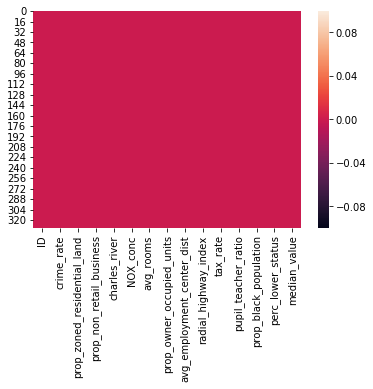

In [17]:
sns.heatmap(train_data.isnull(), cbar = True)

Hence, there are __no null values__ in the training data set.

In [18]:
test_data.isnull().sum()

ID                             0
crime_rate                     0
prop_zoned_residential_land    0
prop_non_retail_business       0
charles_river                  0
NOX_conc                       0
avg_rooms                      0
prop_owner_occupied_units      0
avg_employment_center_dist     0
radial_highway_index           0
tax_rate                       0
pupil_teacher_ratio            0
prop_black_population          0
perc_lower_status              0
dtype: int64

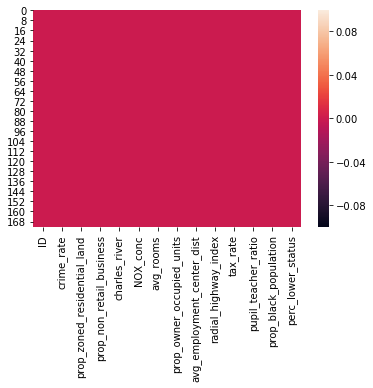

In [19]:
sns.heatmap(test_data.isnull(), cbar = True)

__No null values__ in the testing data set as well.

#### 2.3.4 Check for duplicates entries

In [20]:
train_data.duplicated().sum()

0

In [21]:
test_data.duplicated().sum()

0

#### 2.3.5 Drop irrelevant columns

In [22]:
train_data.columns

Index(['ID', 'crime_rate', 'prop_zoned_residential_land',
       'prop_non_retail_business', 'charles_river', 'NOX_conc', 'avg_rooms',
       'prop_owner_occupied_units', 'avg_employment_center_dist',
       'radial_highway_index', 'tax_rate', 'pupil_teacher_ratio',
       'prop_black_population', 'perc_lower_status', 'median_value'],
      dtype='object')

Since, __ID__ column does not contribute towards the variation in the housing prices, we can safely drop this column from the dtaframe.

In [23]:
#train_data = train_data.drop(['ID'], axis = 1)
#test_data = test_data.drop(['ID'], axis = 1)

### 2.4 Explore data

#### 2.4.1 Check for outliers

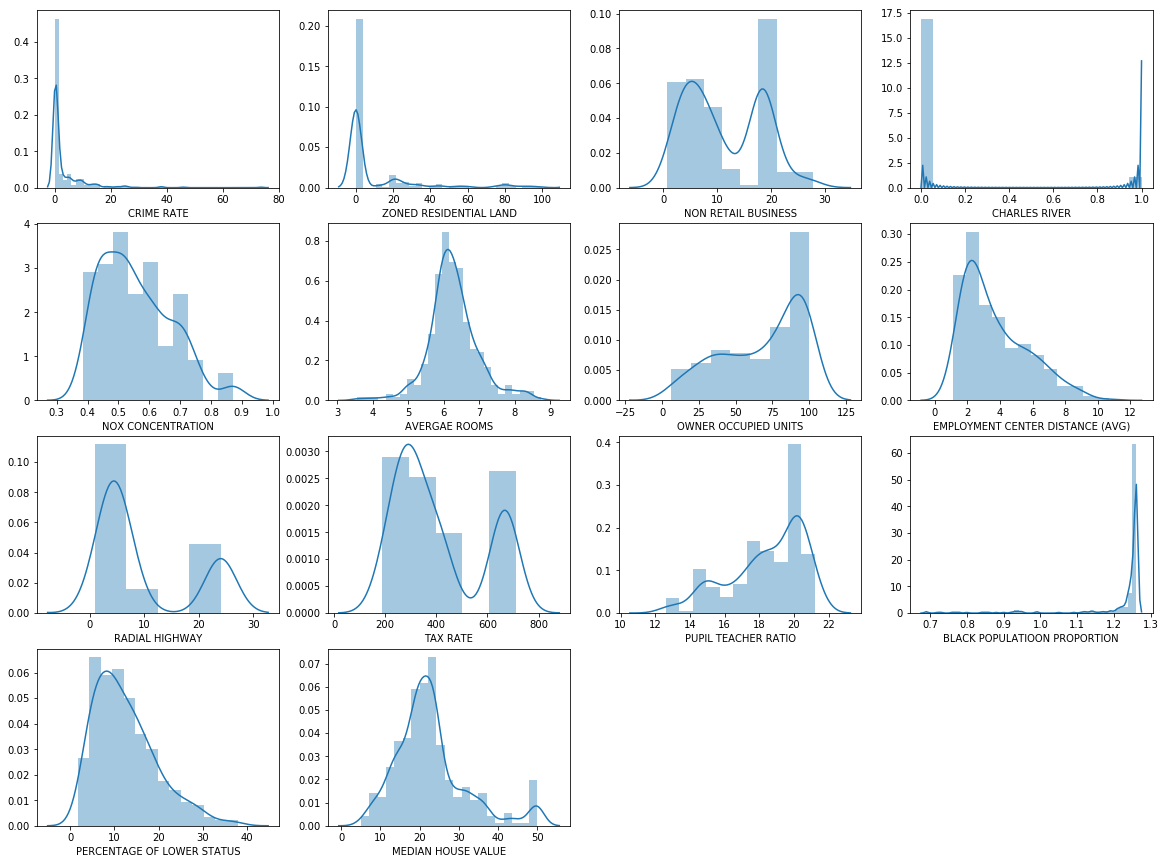

In [24]:
plt.figure(figsize=(20,15))
# crime_rate
plt.subplot(4,4,1)
sns.distplot(train_data['crime_rate'])
plt.xlabel('CRIME RATE')

# prop_zoned_residential_land
plt.subplot(4,4,2)
sns.distplot(train_data['prop_zoned_residential_land'])
plt.xlabel('ZONED RESIDENTIAL LAND')

# prop_non_retail_business
plt.subplot(4,4,3)
sns.distplot(train_data['prop_non_retail_business'])
plt.xlabel('NON RETAIL BUSINESS')

# charles_river
plt.subplot(4,4,4)
sns.distplot(train_data['charles_river'])
plt.xlabel('CHARLES RIVER')

# NOX_conc
plt.subplot(4,4,5)
sns.distplot(train_data['NOX_conc'])
plt.xlabel('NOX CONCENTRATION')

# avg_rooms
plt.subplot(4,4,6)
sns.distplot(train_data['avg_rooms'])
plt.xlabel('AVERGAE ROOMS')

# prop_owner_occupied_units
plt.subplot(4,4,7)
sns.distplot(train_data['prop_owner_occupied_units'])
plt.xlabel('OWNER OCCUPIED UNITS')

# avg_employment_center_dist
plt.subplot(4,4,8)
sns.distplot(train_data['avg_employment_center_dist'])
plt.xlabel('EMPLOYMENT CENTER DISTANCE (AVG)')

# radial_highway_index
plt.subplot(4,4,9)
sns.distplot(train_data['radial_highway_index'])
plt.xlabel('RADIAL HIGHWAY')

# tax_rate
plt.subplot(4,4,10)
sns.distplot(train_data['tax_rate'])
plt.xlabel('TAX RATE')

# pupil_teacher_ratio
plt.subplot(4,4,11)
sns.distplot(train_data['pupil_teacher_ratio'])
plt.xlabel('PUPIL TEACHER RATIO')

# prop_black_population
plt.subplot(4,4,12)
sns.distplot(train_data['prop_black_population'])
plt.xlabel('BLACK POPULATIOON PROPORTION')

# perc_lower_status
plt.subplot(4,4,13)
sns.distplot(train_data['perc_lower_status'])
plt.xlabel('PERCENTAGE OF LOWER STATUS')

# median_value
plt.subplot(4,4,14)
sns.distplot(train_data['median_value'])
plt.xlabel('MEDIAN HOUSE VALUE')

In [25]:
train_data.describe()

,ID,crime_rate,prop_zoned_residential_land,prop_non_retail_business,charles_river,NOX_conc,avg_rooms,prop_owner_occupied_units,avg_employment_center_dist,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status,median_value
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,1.220901,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,0.104339,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,0.690000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,1.240000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,1.260000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,1.260000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,1.260000,37.970000,50.000000


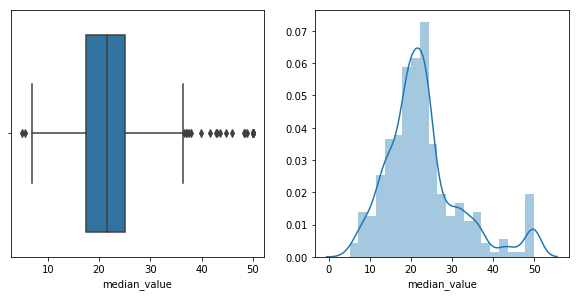

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(train_data['median_value'])

plt.subplot(2,2,2)
sns.distplot(train_data['median_value'])

There are some outliers in the dataset. <br>
And the data is right skewed.

In [27]:
stat = train_data['median_value'].describe()
IQR = stat['75%'] - stat['25%']
upper_limit = stat['75%'] + 1.5*IQR
lower_limit = stat['25%'] - 1.5*IQR
print('Upper_limit: ', upper_limit)
print('Lower_limit: ', lower_limit)

Upper_limit:  36.4
Lower_limit:  6.0


In [28]:
train_data['median_value'].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: median_value, dtype: float64

In [29]:
train_data.loc[train_data.median_value > 36.4]

,ID,crime_rate,prop_zoned_residential_land,prop_non_retail_business,charles_river,NOX_conc,avg_rooms,prop_owner_occupied_units,avg_employment_center_dist,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status,median_value
109,162,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,1.24,1.73,50.0
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,1.25,3.32,50.0
113,167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,1.24,3.70,50.0
125,180,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,1.26,5.04,37.2
126,181,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,1.26,7.56,39.8
128,183,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,1.26,4.82,37.9
130,187,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,1.26,4.45,50.0
133,191,0.09068,45.0,3.44,0,0.4370,6.951,21.5,6.4798,5,398,15.2,1.24,5.10,37.0
141,204,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,1.26,3.81,48.5
142,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,1.25,2.88,50.0


In [30]:
train_data.loc[train_data.median_value< 6.0]

,ID,crime_rate,prop_zoned_residential_land,prop_non_retail_business,charles_river,NOX_conc,avg_rooms,prop_owner_occupied_units,avg_employment_center_dist,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status,median_value
261,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,1.26,30.59,5.0
262,401,25.0461,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,1.26,26.77,5.6


As the median_value are not very far from the upper and lower limits, we will keep the outliers as it is. <br>
For the upper limit (36.4), the max value of median_value is 50. There are multiple entries with median house price as 50, getting rid of these values, might lead to a loss of a whole cluster of residence which might be the poshest area in the Boston city at that time.

#### 2.4.2 Check correlation between variables

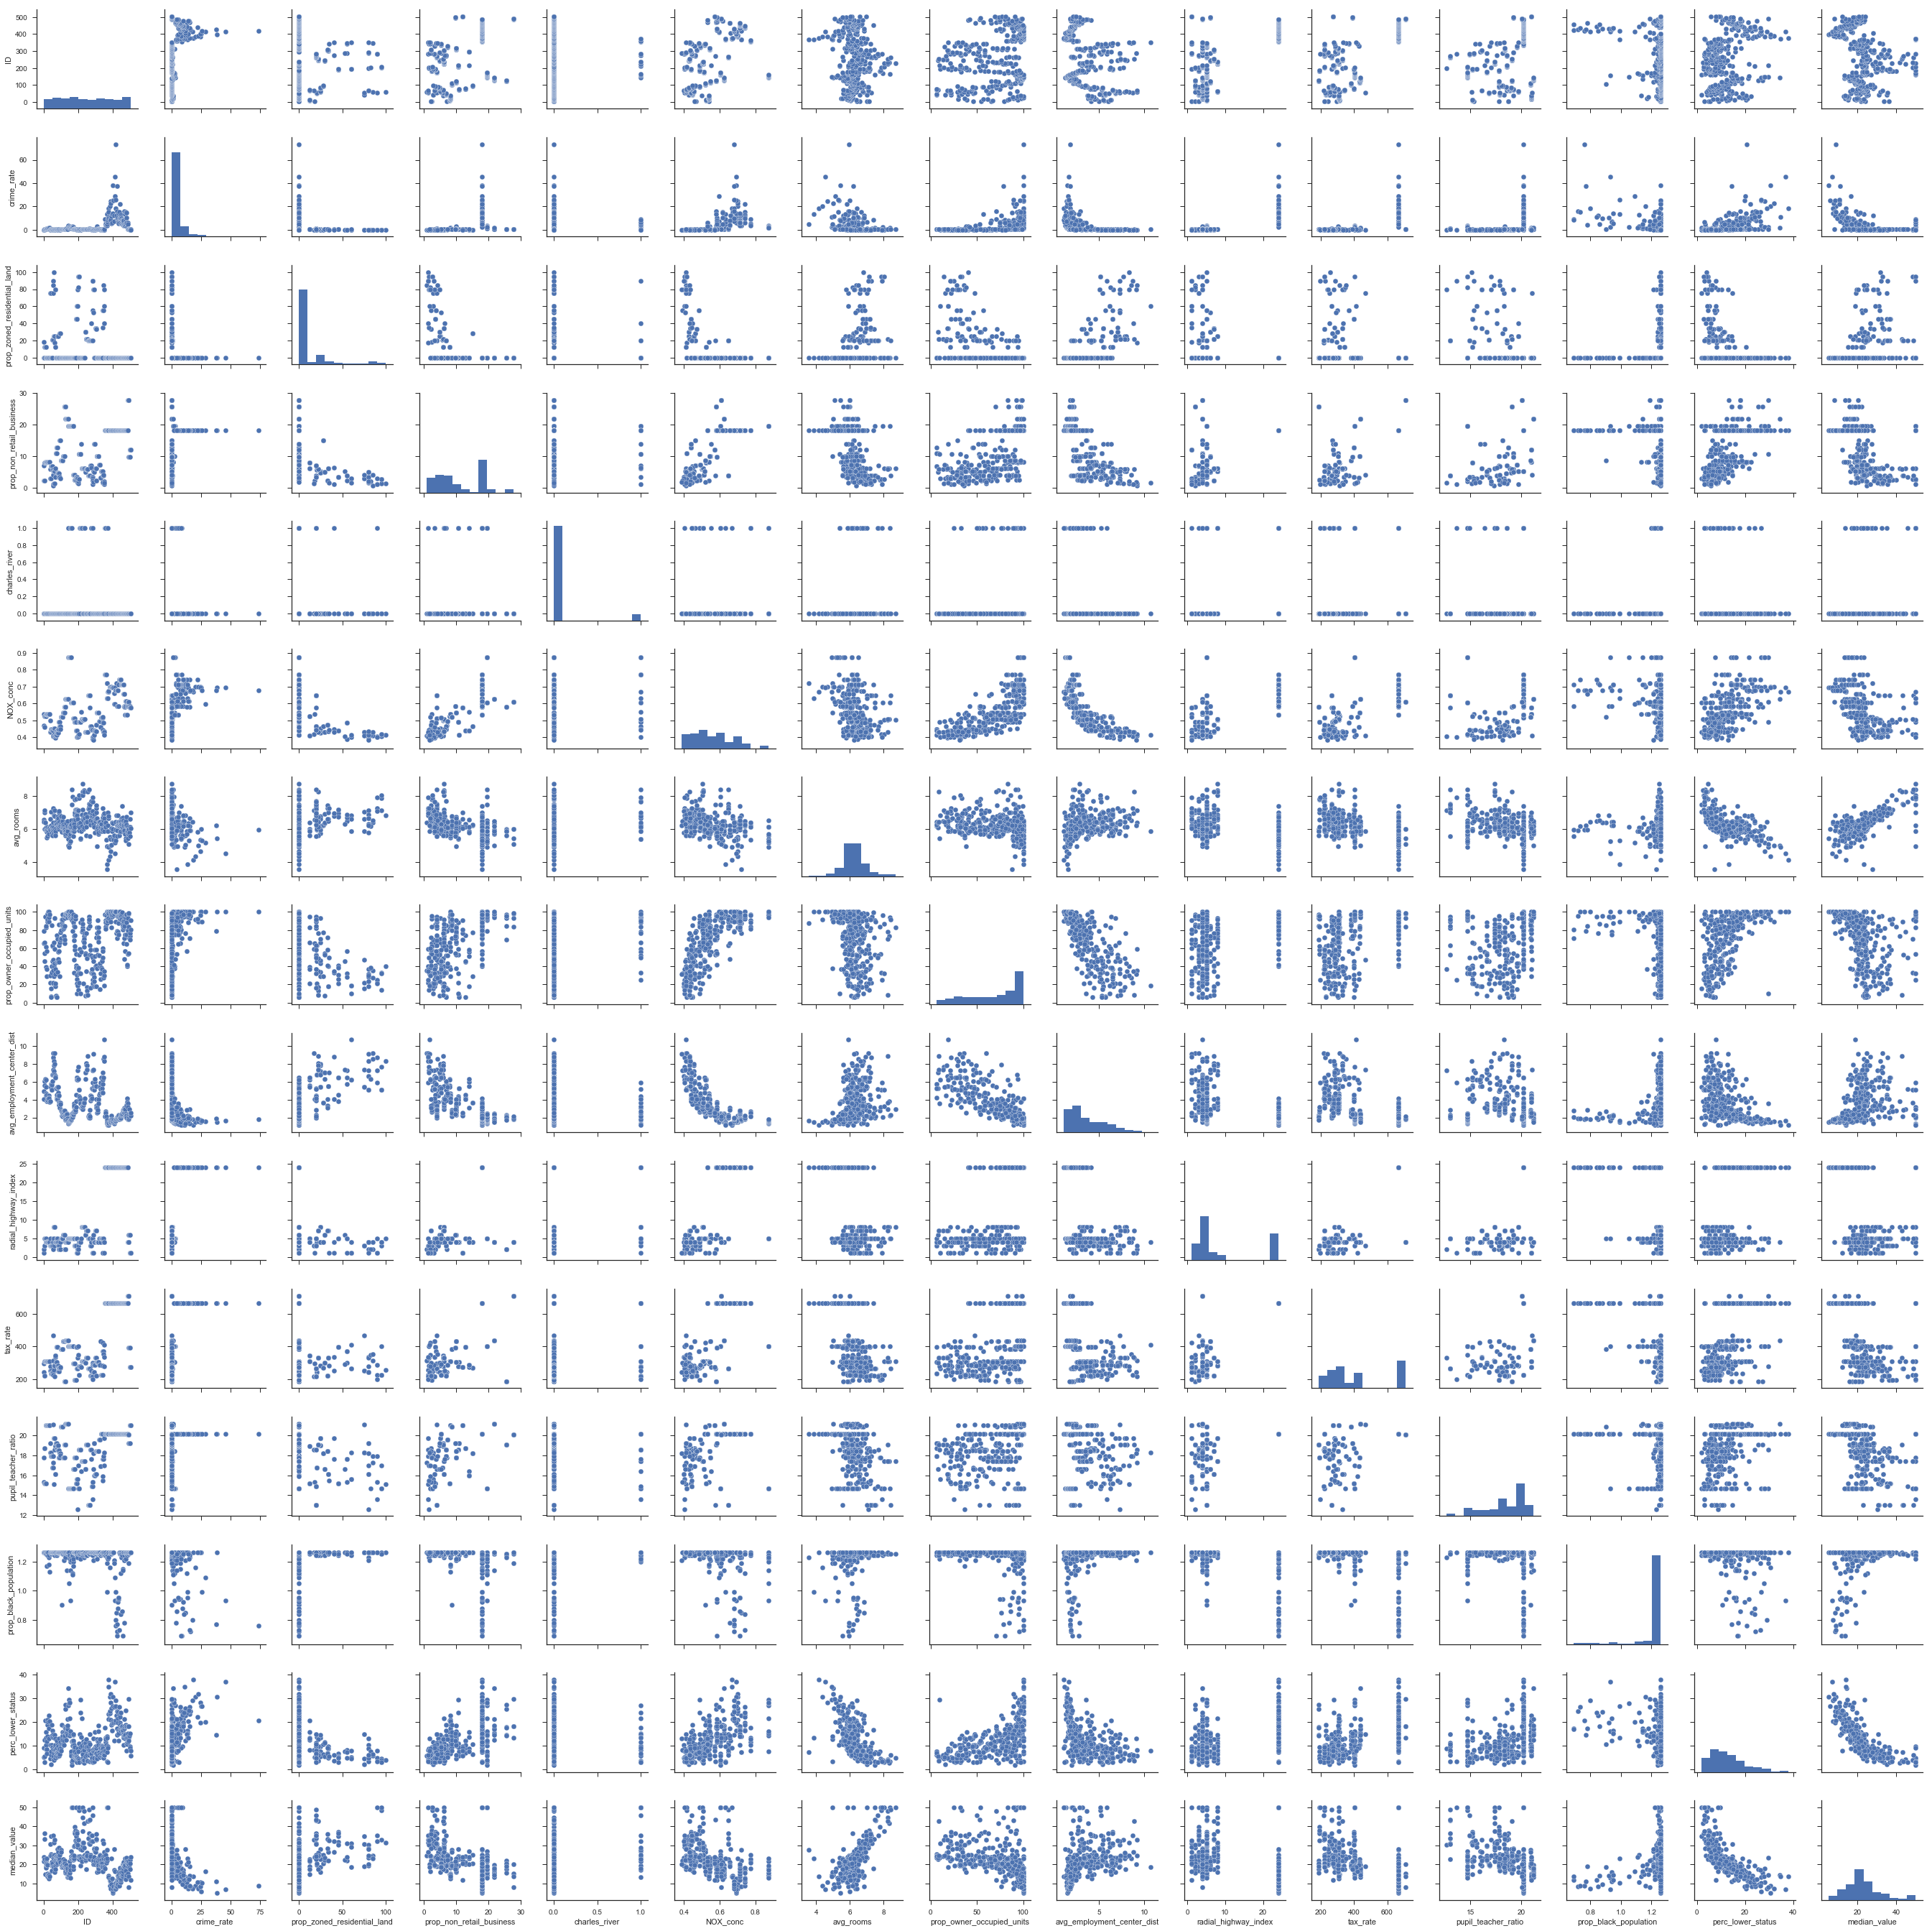

In [31]:
correlation_plot = plt.figure(figsize = (15,15))
sns.set(style="ticks", color_codes=True)
sns.pairplot(train_data)

If we carefully observe the last row of this plot, we can establish the relation of the target varaible 'median_value' to the rest of the features. <br\>

So, to sum up - <br\>
__No relation__ - ID, prop_zoned_residential_land, charles_river<br\>
__Positive relation__ - avg_rooms, avg_employment_center_dist, prop_black_population<br\>
__Negative relation__  - crime_rate,prop_non_retail_business, NOX_conc, prop_owner_occupied_units, radial_highway_index, tax_rate, pupil_teacher_ratio, perc_lower_status

Let's quantify these values before coming to a conclusion.

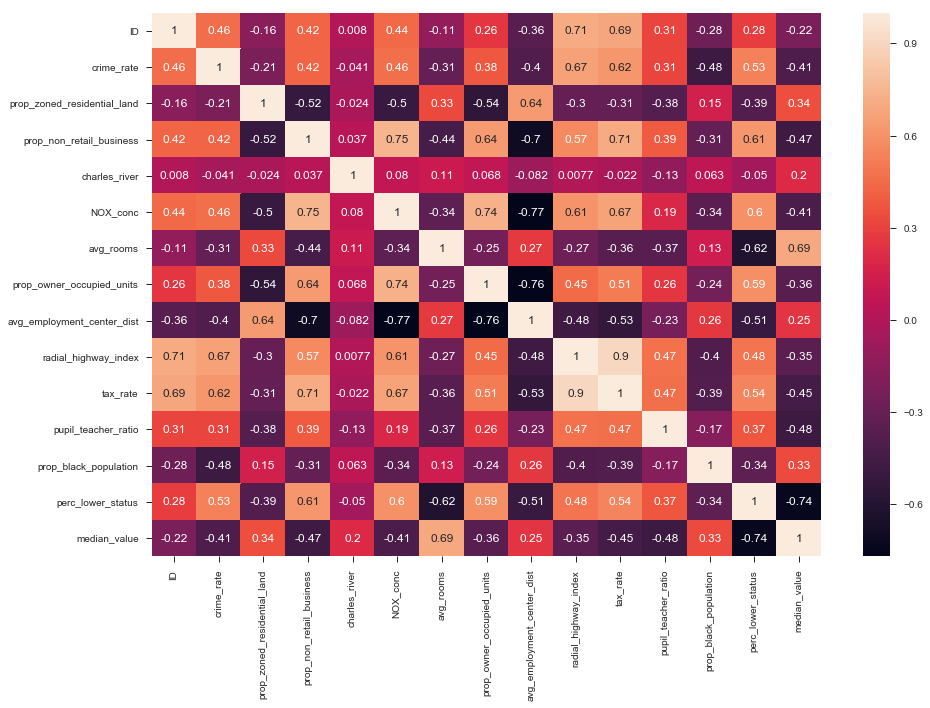

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot = True)

__avg_rooms__ and __perc_lower_status__ have a strong postive and negative correlation with the house price. <br>
__ID__, __avg_employment_center_dist__, __charles_river__ have very weak correlation with the house price and can be dropped as they do not influence the value much. <br>

In [33]:
data = {'Parameters':['ID', 'crime_rate', 'prop_zoned_residential_land','prop_non_retail_business',
                      'charles_river', 'NOX_conc', 'avg_rooms','prop_owner_occupied_units', 'avg_employment_center_dist',
                      'radial_highway_index', 'tax_rate', 'pupil_teacher_ratio','prop_black_population', 
                      'perc_lower_status', 'median_value'],
       'Correlation value':[-0.22,-0.41,0.34,-0.47,0.2,-0.41,0.69,-0.36,0.25,-0.35,-0.45,-0.48,0.33,-0.74,1]}
df = pd.DataFrame(data, columns = ['Parameters','Correlation value'])
df

,Parameters,Correlation value
0,ID,-0.22
1,crime_rate,-0.41
2,prop_zoned_residential_land,0.34
3,prop_non_retail_business,-0.47
4,charles_river,0.20
5,NOX_conc,-0.41
6,avg_rooms,0.69
7,prop_owner_occupied_units,-0.36
8,avg_employment_center_dist,0.25
9,radial_highway_index,-0.35


In [34]:
df2 = df.sort_values(by=['Correlation value'], ascending=False)
df2

,Parameters,Correlation value
14,median_value,1.00
6,avg_rooms,0.69
2,prop_zoned_residential_land,0.34
12,prop_black_population,0.33
8,avg_employment_center_dist,0.25
4,charles_river,0.20
0,ID,-0.22
9,radial_highway_index,-0.35
7,prop_owner_occupied_units,-0.36
1,crime_rate,-0.41


In [35]:
train = train_data.drop(['ID','avg_employment_center_dist','charles_river'], axis = 1)
test = test_data.drop(['ID','avg_employment_center_dist','charles_river'], axis = 1)

In [36]:
train.head()

,crime_rate,prop_zoned_residential_land,prop_non_retail_business,NOX_conc,avg_rooms,prop_owner_occupied_units,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status,median_value
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,1.26,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,1.26,9.14,21.6
2,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,1.26,2.94,33.4
3,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,1.26,5.33,36.2
4,0.08829,12.5,7.87,0.524,6.012,66.6,5,311,15.2,1.26,12.43,22.9


In [37]:
train.shape

(333, 12)

In [38]:
test.shape

(173, 11)

__Summary__
1. There are a total of 11 independent variables present for the model. <br>
2. The data is normal. <br>
3. avg_rooms and perc_lower_status highly influence the house prices. <br>
4. The target variable is a continuous value.

## 3. DEVELOP

Since the target variable is a continuous value, this problem can be classified as a regression problem.<br>

In [39]:
cols = [col for col in train.columns if col not in ['median_value']]
features = train[cols]
features.head()

,crime_rate,prop_zoned_residential_land,prop_non_retail_business,NOX_conc,avg_rooms,prop_owner_occupied_units,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,1.26,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,1.26,9.14
2,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,1.26,2.94
3,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,1.26,5.33
4,0.08829,12.5,7.87,0.524,6.012,66.6,5,311,15.2,1.26,12.43


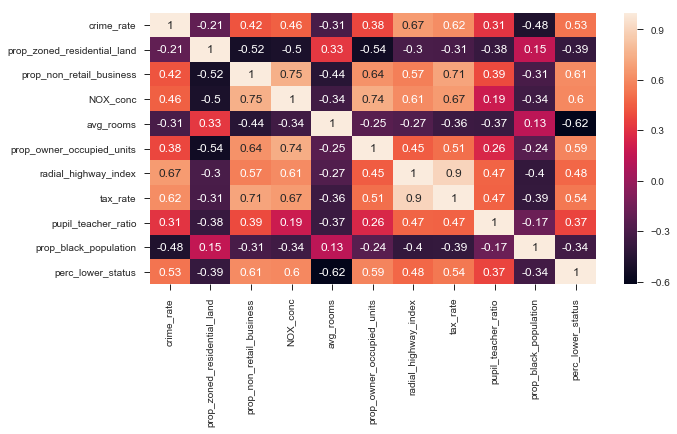

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(features.corr(),annot = True)

In [41]:
ls_data = {'Parameters':['crime_rate', 'prop_zoned_residential_land','prop_non_retail_business',
                      'NOX_conc', 'avg_rooms','prop_owner_occupied_units','radial_highway_index', 'tax_rate', 
                        'pupil_teacher_ratio','prop_black_population', 'perc_lower_status'],
       'Correlation value':[0.53,-0.39,0.61,0.6,-0.62, 0.59,0.48,0.54,0.37,-0.34,1]}
ls_df = pd.DataFrame(ls_data, columns = ['Parameters','Correlation value'])
ls_df.sort_values(by=['Correlation value'], ascending = False)

,Parameters,Correlation value
10,perc_lower_status,1.00
2,prop_non_retail_business,0.61
3,NOX_conc,0.60
5,prop_owner_occupied_units,0.59
7,tax_rate,0.54
0,crime_rate,0.53
6,radial_highway_index,0.48
8,pupil_teacher_ratio,0.37
9,prop_black_population,-0.34
1,prop_zoned_residential_land,-0.39


### 3.1 Multiple Linear Regression model

Checking linear relation between dependent and independent variables

__avg_rooms__

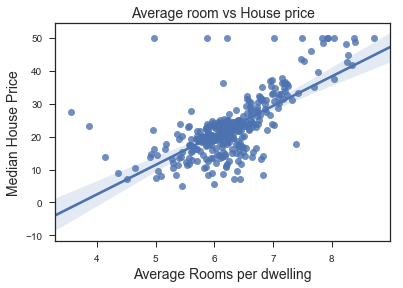

In [42]:
sns.regplot(train['avg_rooms'], train['median_value'])
plt.title('Average room vs House price', fontsize=14)
plt.xlabel('Average Rooms per dwelling', fontsize=14)
plt.ylabel('Median House Price', fontsize=14)

__perc_lower_status__

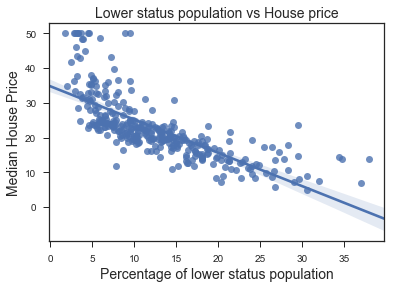

In [43]:
sns.regplot(train['perc_lower_status'], train['median_value'])
plt.title('Lower status population vs House price', fontsize=14)
plt.xlabel('Percentage of lower status population', fontsize=14)
plt.ylabel('Median House Price', fontsize=14)

In [44]:
mlr_features = train[['avg_rooms','perc_lower_status']]
mlr_target = train['median_value']

mlr = LinearRegression()
mlr.fit(mlr_features, mlr_target)

print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

Intercept: 
 0.103943802022
Coefficients: 
 [ 4.92846523 -0.65639414]


In [45]:
R2 = mlr.score(mlr_features, mlr_target)
print("R^2 for multiple linear regression: ", R2)

R^2 for multiple linear regression:  0.634333967766


In [46]:
pred_target = mlr.predict(mlr_features)

In [47]:
rms = math.sqrt(mean_squared_error(mlr_target, pred_target))
print('RMSE value for multiple linear regression: ', rms)

RMSE value for multiple linear regression:  5.5388905877004975


In [48]:
data = {'median_value':train['median_value'],
       'predicted_value':pred_target}
df = pd.DataFrame(data)
df.head()

,median_value,predicted_value
0,24.0,29.239760
1,21.6,25.750177
2,33.4,32.663545
3,36.2,31.829104
4,22.9,21.574898


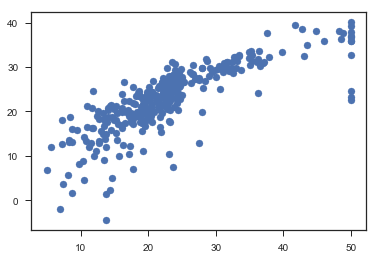

In [49]:
plt.scatter(mlr_target, pred_target)

Adding one more variable for better accuracy of the model.

__pupil_teacher_ratio__

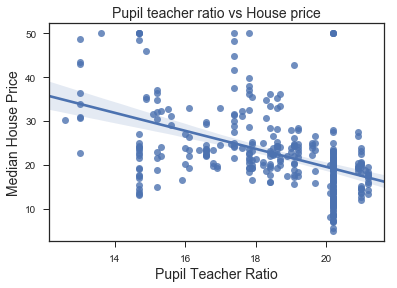

In [50]:
sns.regplot(train['pupil_teacher_ratio'], train['median_value'])
plt.title('Pupil teacher ratio vs House price', fontsize=14)
plt.xlabel('Pupil Teacher Ratio', fontsize=14)
plt.ylabel('Median House Price', fontsize=14)

In [51]:
mlr_features_pupil = train[['avg_rooms','perc_lower_status','pupil_teacher_ratio']]

In [52]:
mlr1 = LinearRegression()
mlr1.fit(mlr_features_pupil, mlr_target)
print('Intercept: \n', mlr1.intercept_)
print('Coefficients: \n', mlr1.coef_)

Intercept: 
 17.1970920462
Coefficients: 
 [ 4.40130022 -0.5989809  -0.7864618 ]


In [53]:
R2_1 = mlr1.score(mlr_features_pupil, mlr_target)
print("R^2 for multiple linear regression with pupil_teacher_ratio: ", R2_1)

R^2 for multiple linear regression with pupil_teacher_ratio:  0.662570129109


In [54]:
pred_target_1 = mlr1.predict(mlr_features_pupil)
rms1 = math.sqrt(mean_squared_error(mlr_target, pred_target_1))
rms1

5.32074247646767

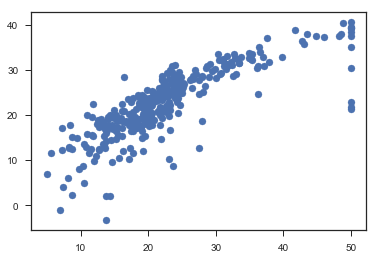

In [55]:
plt.scatter(mlr_target, pred_target_1)

__all variables except for non correlated variables__

Dropping __avg_rooms__ as it has a higher correlation with __perc_lower_status__ and lower correlation with the target variable in comparison to perc_lower_status.

Intercept: 
 52.0338101764
Coefficients: 
 [-0.8428815  -1.01452535]
R^2 for multiple linear regression without rooms:  0.594207570086
RMSE for multiple linear regression without rooms:  5.834886965391079


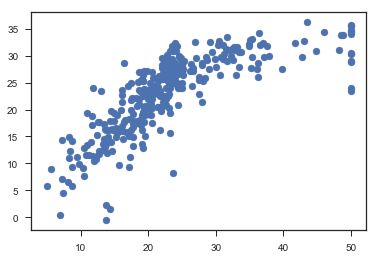

In [56]:
mlr_features_no_rooms = train[['perc_lower_status','pupil_teacher_ratio']]

mlr2 = LinearRegression()
mlr2.fit(mlr_features_no_rooms, mlr_target)
print('Intercept: \n', mlr2.intercept_)
print('Coefficients: \n', mlr2.coef_)

R2_2 = mlr2.score(mlr_features_no_rooms, mlr_target)
print("R^2 for multiple linear regression without rooms: ", R2_2)

pred_target_2 = mlr2.predict(mlr_features_no_rooms)
rms2 = math.sqrt(mean_squared_error(mlr_target, pred_target_2))
print("RMSE for multiple linear regression without rooms: ", rms2)

plt.scatter(mlr_target, pred_target_2)

### 3.2 LassoCV()

Using LassoCV() for feature selection, to understand which features are more prone to change the values of the target variables.

In [57]:
reg = LassoCV()
reg.fit(features, train['median_value'])
print("Best alpha using built-in LassoCV: ", reg.alpha_)
print("Best score using built-in LassoCV: ", reg.score(features, train['median_value']))

coef = pd.Series(reg.coef_, index = features.columns)
print(coef)

Best alpha using built-in LassoCV:  0.863146343995
Best score using built-in LassoCV:  0.650005357334
crime_rate                    -0.036511
prop_zoned_residential_land    0.029325
prop_non_retail_business       0.000723
NOX_conc                      -0.000000
avg_rooms                      1.071655
prop_owner_occupied_units      0.047120
radial_highway_index           0.273160
tax_rate                      -0.014010
pupil_teacher_ratio           -0.725984
prop_black_population          0.000000
perc_lower_status             -0.826243
dtype: float64


perc_lower_status             -0.826243
pupil_teacher_ratio           -0.725984
crime_rate                    -0.036511
tax_rate                      -0.014010
NOX_conc                      -0.000000
prop_black_population          0.000000
prop_non_retail_business       0.000723
prop_zoned_residential_land    0.029325
prop_owner_occupied_units      0.047120
radial_highway_index           0.273160
avg_rooms                      1.071655
dtype: float64


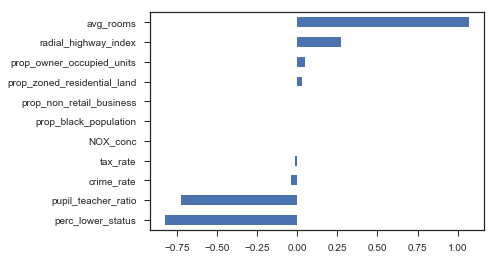

In [58]:
imp_coef = coef.sort_values()
print(imp_coef)
imp_coef.plot(kind='barh')

Dropping features -  <br>
1. prop_non_retail_business
2. prop_black_population
3. NOX_conc

In [59]:
new_features = train[['perc_lower_status', 'pupil_teacher_ratio', 'crime_rate', 'tax_rate', 'prop_zoned_residential_land', 
                      'prop_owner_occupied_units','radial_highway_index', 'avg_rooms']]

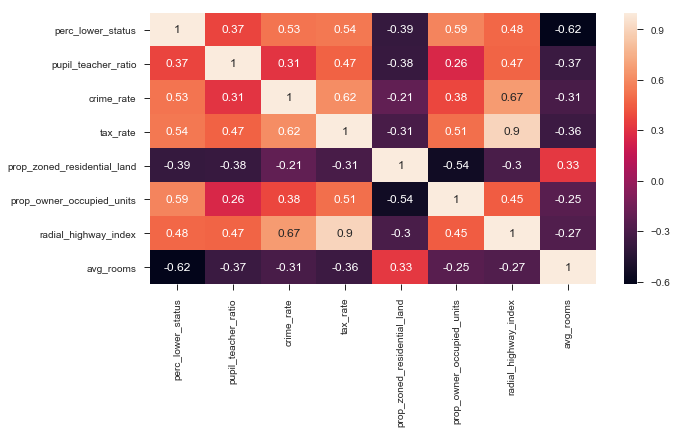

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(new_features.corr(),annot = True)

Intercept: 
 23.4268819548
Coefficients: 
 [-0.65572001 -0.87481347 -0.07478537 -0.01259065  0.01090512  0.03054111
  0.30159761  3.82815313]
R^2 for multiple linear regression:  0.678429918697
RMSE for multiple linear regression:  5.19419553356245


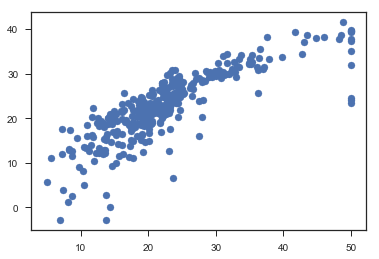

In [61]:
mlr_new_features = new_features

mlr_new = LinearRegression()
mlr_new.fit(mlr_new_features, mlr_target)
print('Intercept: \n', mlr_new.intercept_)
print('Coefficients: \n', mlr_new.coef_)

R2_new = mlr_new.score(mlr_new_features, mlr_target)
print("R^2 for multiple linear regression: ", R2_new)

pred_target_new = mlr_new.predict(mlr_new_features)
rms_new = math.sqrt(mean_squared_error(mlr_target, pred_target_new))
print("RMSE for multiple linear regression: ", rms_new)

plt.scatter(mlr_target, pred_target_new)

__without avg_rooms__

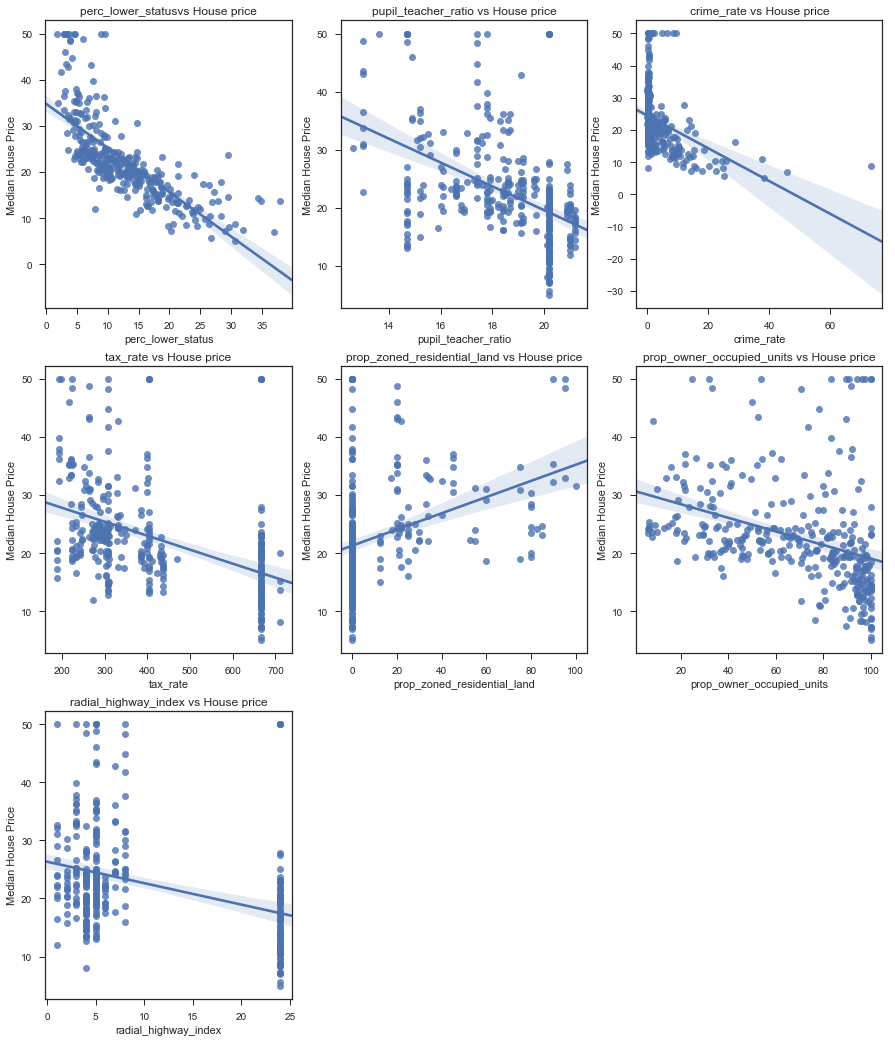

In [62]:
plt.figure(figsize=(15,18))
plt.subplot(3,3,1)
sns.regplot(train['perc_lower_status'], train['median_value'])
plt.title('perc_lower_statusvs House price')
plt.xlabel('perc_lower_status')
plt.ylabel('Median House Price')

plt.subplot(3,3,2)
sns.regplot(train['pupil_teacher_ratio'], train['median_value'])
plt.title('pupil_teacher_ratio vs House price')
plt.xlabel('pupil_teacher_ratio')
plt.ylabel('Median House Price')

plt.subplot(3,3,3)
sns.regplot(train['crime_rate'], train['median_value'])
plt.title('crime_rate vs House price')
plt.xlabel('crime_rate')
plt.ylabel('Median House Price')

plt.subplot(3,3,4)
sns.regplot(train['tax_rate'], train['median_value'])
plt.title('tax_rate vs House price')
plt.xlabel('tax_rate')
plt.ylabel('Median House Price')

plt.subplot(3,3,5)
sns.regplot(train['prop_zoned_residential_land'], train['median_value'])
plt.title('prop_zoned_residential_land vs House price')
plt.xlabel('prop_zoned_residential_land')
plt.ylabel('Median House Price')

plt.subplot(3,3,6)
sns.regplot(train['prop_owner_occupied_units'], train['median_value'])
plt.title('prop_owner_occupied_units vs House price')
plt.xlabel('prop_owner_occupied_units')
plt.ylabel('Median House Price')

plt.subplot(3,3,7)
sns.regplot(train['radial_highway_index'], train['median_value'])
plt.title('radial_highway_index vs House price')
plt.xlabel('radial_highway_index')
plt.ylabel('Median House Price')

In the new feature set, also dropping __avg_rooms__ as it has hogh correlation with __perc_lower_status__.

Intercept: 
 55.3373173569
Coefficients: 
 [-0.90554538 -1.13178322 -0.07493001 -0.01701887  0.04490918  0.39416122]
R^2 for multiple linear regression without rooms:  0.627850507695
RMSE for multiple linear regression without rooms:  5.587778626679053


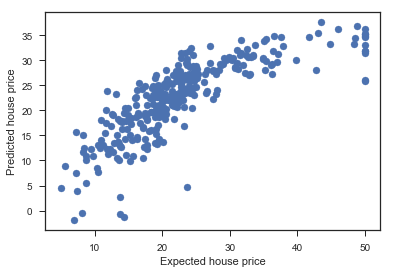

In [63]:
mlr_new_features_4 = new_features[['perc_lower_status', 'pupil_teacher_ratio', 'crime_rate', 'tax_rate', 
                      'prop_owner_occupied_units','radial_highway_index']]

mlr_new_4 = LinearRegression()
mlr_new_4.fit(mlr_new_features_4, mlr_target)
print('Intercept: \n', mlr_new_4.intercept_)
print('Coefficients: \n', mlr_new_4.coef_)

R2_new_4 = mlr_new_4.score(mlr_new_features_4, mlr_target)
print("R^2 for multiple linear regression without rooms: ", R2_new_4)

pred_target_new_4 = mlr_new_4.predict(mlr_new_features_4)
rms_new_4 = math.sqrt(mean_squared_error(mlr_target, pred_target_new_4))
print("RMSE for multiple linear regression without rooms: ", rms_new_4)

plt.scatter(mlr_target, pred_target_new_4)
plt.xlabel('Expected house price')
plt.ylabel('Predicted house price')

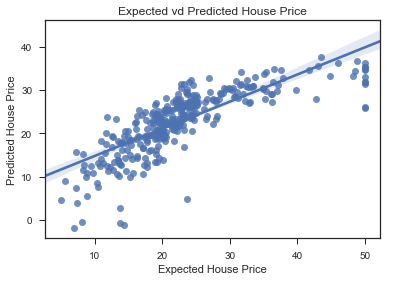

In [64]:
sns.regplot(mlr_target, pred_target_new_4)
plt.title('Expected vd Predicted House Price')
plt.xlabel('Expected House Price')
plt.ylabel('Predicted House Price')


So, the final model after using LassoCV() for feature selection and getting rid of avg_rooms (due to high correlation) has <br>
__1. R^2:  0.627850507695__ <br>
__2. RMSE:  5.587778626679053__

## 4. DEPLOY

### 4.1 Estimate house prices for test data set

In [66]:
mlr_new_features_pred = test[['perc_lower_status', 'pupil_teacher_ratio', 'crime_rate', 'tax_rate', 
                      'prop_owner_occupied_units','radial_highway_index']]

test_prediction = mlr_new_4.predict(mlr_new_features_pred)

In [67]:
test_copy = test.copy()

In [68]:
test_copy['Predicted House Price'] = test_prediction

In [69]:
test_copy.head()

,crime_rate,prop_zoned_residential_land,prop_non_retail_business,NOX_conc,avg_rooms,prop_owner_occupied_units,radial_highway_index,tax_rate,pupil_teacher_ratio,prop_black_population,perc_lower_status,Predicted House Price
0,0.02729,0.0,7.07,0.469,7.185,61.1,2,242,17.8,1.26,4.03,30.953891
1,0.02985,0.0,2.18,0.458,6.430,58.7,3,222,18.7,1.26,5.21,29.493307
2,0.14455,12.5,7.87,0.524,6.172,96.1,5,311,15.2,1.26,19.15,21.775898
3,0.21124,12.5,7.87,0.524,5.631,100.0,5,311,15.2,1.25,29.93,12.184267
4,0.17004,12.5,7.87,0.524,6.004,85.9,5,311,15.2,1.25,17.10,23.172282
